<a href="https://colab.research.google.com/github/harshgirate/customer_churn_detection/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns=
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

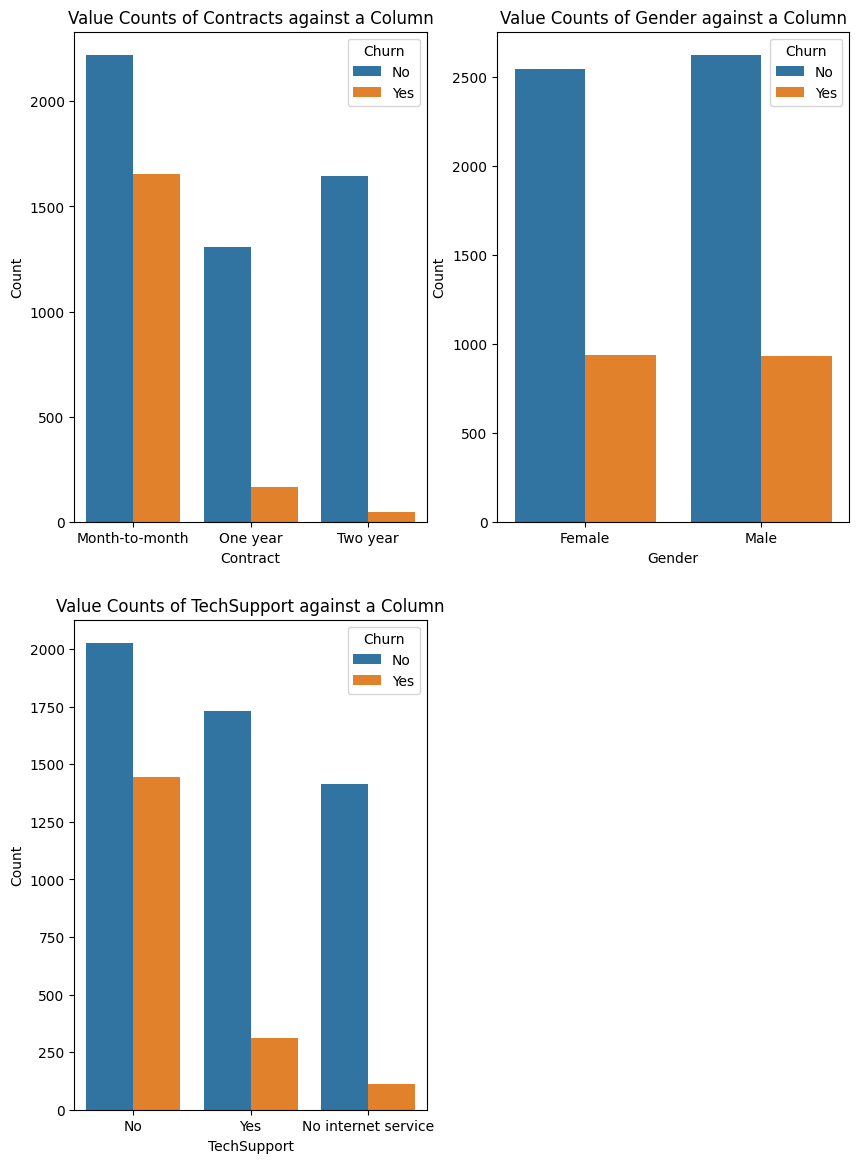

In [ ]:
plt.figure(figsize=(10,14))
plt.subplot(2,2,1)
sns.countplot(data=df,x='Contract', hue='Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Value Counts of Contracts against a Column')
# plt.show()

plt.subplot(2,2,2)
sns.countplot(data=df,x='gender', hue='Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Value Counts of Gender against a Column')
# plt.show()

plt.subplot(2,2,3)
sns.countplot(data=df,x='TechSupport', hue='Churn')
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.title('Value Counts of TechSupport against a Column')

plt.show()

In [ ]:
le=LabelEncoder()

In [ ]:
df.gender=le.fit_transform(df.gender)
df.Partner=le.fit_transform(df.Partner)
df.Dependents=le.fit_transform(df.Dependents)
df.PhoneService=le.fit_transform(df.PhoneService)
df.MultipleLines=le.fit_transform(df.MultipleLines)
df.Contract=le.fit_transform(df.Contract)
df.InternetService=le.fit_transform(df.InternetService)
df.OnlineSecurity=le.fit_transform(df.OnlineSecurity)
df.DeviceProtection=le.fit_transform(df.DeviceProtection)
df.TechSupport=le.fit_transform(df.TechSupport)
df.StreamingTV=le.fit_transform(df.StreamingTV)
df.StreamingMovies=le.fit_transform(df.StreamingMovies)
df.PaperlessBilling=le.fit_transform(df.PaperlessBilling)
df.PaymentMethod=le.fit_transform(df.PaymentMethod)
df.OnlineBackup=le.fit_transform(df.OnlineBackup)
df.Churn=le.fit_transform(df.Churn)

In [ ]:
df_1=df.drop(['customerID'],axis=1)

In [ ]:
# Check for non-numeric values in the 'TotalCharges' column
non_numeric_values = df_1[~df_1['TotalCharges'].str.isnumeric()]

# If there are non-numeric values, remove them
if len(non_numeric_values) > 0:
    df_1 = df_1.drop(non_numeric_values.index)

In [ ]:
df_1['MonthlyCharges']=df_1['MonthlyCharges'].astype(int)
df_1['TotalCharges']=df_1['TotalCharges'].astype(int)

In [ ]:
x=df_1.iloc[:,0:19]
y=df_1.iloc[:,19:]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=22)

In [ ]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
544,1,0,0,0,13,0,1,0,2,0,0,2,2,0,0,1,1,45,597
5693,1,1,1,0,72,1,2,0,0,0,2,0,2,2,2,1,1,73,5329
2024,1,0,0,0,12,1,0,1,0,0,2,0,2,2,1,0,2,95,1184
6723,1,0,0,0,46,1,0,2,1,1,1,1,1,1,2,0,0,20,902
3873,0,0,1,1,51,0,1,0,2,0,0,2,0,0,2,0,0,34,1782


In [ ]:
print(x_train.dtypes)
print(y_train.dtypes)

gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
dtype: object
Churn    int64
dtype: object


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(round(accuracy_score(y_test,y_pred)*100),'%')

85 %


In [ ]:
ts=[0.5,0.4,0.3,0.2]
acc=[]#empty list
for i in ts:
  x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=i,random_state=71)
  model1=LogisticRegression()
  model1.fit(x_train1,y_train1)
  pred1=model1.predict(x_test1)
  acc.append(round(accuracy_score(y_test1,pred1)*100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [ ]:
acc

[85, 83, 84, 82]

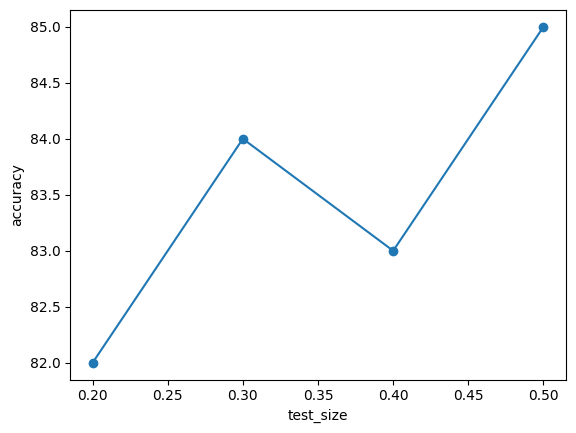

In [ ]:
plt.plot(ts,acc,marker='o')
plt.xlabel('test_size')
plt.ylabel('accuracy')
plt.show()